Obtenha os seguintes dados no SIDRA/IBGE:
• Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de
idade (%).


### Tratamento e limpeza dos dados coletados

In [78]:
# Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter


In [79]:
desemprego = pd.read_csv(r'M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 2\Base de dados\Taxa de desocupação.csv', delimiter = ";")
desemprego_eua = pd.read_csv(r"M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 2\Base de dados\UNRATE USA.csv")


In [80]:
def determinar_trimestre(periodo):
    mes = periodo.split('-')[0]
    if mes in ['jan', 'fev', 'mar']:
        return 'T01'
    elif mes in ['abr', 'mai', 'jun']:
        return 'T02'
    elif mes in ['jul', 'ago', 'set']:
        return 'T03'
    elif mes in ['out', 'nov', 'dez']:
        return 'T04'

desemprego['Trimestre'] = desemprego['Data'].apply(determinar_trimestre)
desemprego['Ano'] = desemprego['Data'].str[-4:]
desemprego['Trimestre-Ano'] = desemprego['Trimestre'] + ' ' + desemprego['Ano']

print(desemprego.head(12))

# Verificando valores NaT
print("Valores NaT encontrados:", desemprego['Data'].isna().sum())


                Data  Taxa de desocupação (%) Trimestre   Ano Trimestre-Ano
0   jan-fev-mar 2012                      8.0       T01  2012      T01 2012
1   fev-mar-abr 2012                      7.8       T01  2012      T01 2012
2   mar-abr-mai 2012                      7.7       T01  2012      T01 2012
3   abr-mai-jun 2012                      7.6       T02  2012      T02 2012
4   mai-jun-jul 2012                      7.5       T02  2012      T02 2012
5   jun-jul-ago 2012                      7.4       T02  2012      T02 2012
6   jul-ago-set 2012                      7.1       T03  2012      T03 2012
7   ago-set-out 2012                      7.0       T03  2012      T03 2012
8   set-out-nov 2012                      6.8       T03  2012      T03 2012
9   out-nov-dez 2012                      6.9       T04  2012      T04 2012
10  nov-dez-jan 2013                      7.3       T04  2013      T04 2013
11  dez-jan-fev 2013                      7.8       T04  2013      T04 2013
Valores NaT 

In [81]:
desemprego.head()

,Data,Taxa de desocupação (%),Trimestre,Ano,Trimestre-Ano
0,jan-fev-mar 2012,8.0,T01,2012,T01 2012
1,fev-mar-abr 2012,7.8,T01,2012,T01 2012
2,mar-abr-mai 2012,7.7,T01,2012,T01 2012
3,abr-mai-jun 2012,7.6,T02,2012,T02 2012
4,mai-jun-jul 2012,7.5,T02,2012,T02 2012


In [82]:
# Media da taxa de desemprego trimestral do Brasil
desemprego = desemprego.groupby('Trimestre-Ano', as_index=False).agg({
    'Taxa de desocupação (%)': 'mean'
})

# Ordenação do Trimestre-Ano
desemprego['Trimestre_Numérico'] = desemprego['Trimestre-Ano'].str.split().str[0].str[-2:].astype(int)
desemprego['Ano'] = desemprego['Trimestre-Ano'].str.split().str[1].astype(int)

desemprego = desemprego.sort_values(by=['Ano', 'Trimestre_Numérico']).drop(columns=['Trimestre_Numérico', 'Ano'])
desemprego.reset_index(drop=True, inplace=True)
desemprego.columns = ['Data', 'Taxa de desocupação']

desemprego.head(12)

,Data,Taxa de desocupação
0,T01 2012,7.833333
1,T02 2012,7.500000
2,T03 2012,6.966667
3,T04 2012,6.900000
4,T01 2013,7.900000
5,T02 2013,7.366667
6,T03 2013,6.800000
7,T04 2013,7.133333
8,T01 2014,7.166667
9,T02 2014,6.966667


Tratar a base de dados da taxa de desemprego dos EUA

In [83]:
desemprego_eua.head(12)

,DATE,UNRATE
0,2012-01-01,8.3
1,2012-02-01,8.3
2,2012-03-01,8.2
3,2012-04-01,8.2
4,2012-05-01,8.2
5,2012-06-01,8.2
6,2012-07-01,8.2
7,2012-08-01,8.1
8,2012-09-01,7.8
9,2012-10-01,7.8


In [84]:
desemprego_eua = pd.read_csv(r"M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 2\Base de dados\UNRATE USA.csv")

In [85]:
desemprego_eua.columns = ['Data', 'Taxa de desemprego']

desemprego_eua['Data'] = pd.to_datetime(desemprego_eua['Data'], errors='coerce')

def determinar_trimestre(mes):
    if mes in [1, 2, 3]:
        return 'T01'
    elif mes in [4, 5, 6]:
        return 'T02'
    elif mes in [7, 8, 9]:
        return 'T03'
    elif mes in [10, 11, 12]:
        return 'T04'

desemprego_eua['Trimestre'] = desemprego_eua['Data'].dt.month.apply(determinar_trimestre)
desemprego_eua['Trimestre-Ano'] = desemprego_eua['Trimestre'] + ' ' + desemprego_eua['Data'].dt.year.astype(str)

print(desemprego_eua.head(12))
print("Valores NaT encontrados:", desemprego_eua['Data'].isna().sum())

         Data  Taxa de desemprego Trimestre Trimestre-Ano
0  2012-01-01                 8.3       T01      T01 2012
1  2012-02-01                 8.3       T01      T01 2012
2  2012-03-01                 8.2       T01      T01 2012
3  2012-04-01                 8.2       T02      T02 2012
4  2012-05-01                 8.2       T02      T02 2012
5  2012-06-01                 8.2       T02      T02 2012
6  2012-07-01                 8.2       T03      T03 2012
7  2012-08-01                 8.1       T03      T03 2012
8  2012-09-01                 7.8       T03      T03 2012
9  2012-10-01                 7.8       T04      T04 2012
10 2012-11-01                 7.7       T04      T04 2012
11 2012-12-01                 7.9       T04      T04 2012
Valores NaT encontrados: 0


In [102]:
# Media da taxa de desemprego dos EUA
df_desemprego_eua = desemprego_eua.groupby('Trimestre-Ano', as_index=False).agg({
    'Taxa de desemprego': 'mean'
})

# Ordenação do Trimestre-Ano está em ordem alfabética, deve-se reordenar
df_desemprego_eua['Ano'] = df_desemprego_eua['Trimestre-Ano'].str.split().str[1].astype(int)
df_desemprego_eua['Trimestre_Numérico'] = df_desemprego_eua['Trimestre-Ano'].str.split().str[0].str[-2:].astype(int)

# Ordenar com base no ano e no trimestre
df_desemprego_eua = df_desemprego_eua.sort_values(by=['Ano', 'Trimestre_Numérico']).drop(columns=['Ano', 'Trimestre_Numérico'])
df_desemprego_eua.reset_index(drop=True, inplace=True)
df_desemprego_eua.columns = ['Data', 'Taxa de desemprego']

print(df_desemprego_eua.head(12))

        Data  Taxa de desemprego
0   T01 2012            8.266667
1   T02 2012            8.200000
2   T03 2012            8.033333
3   T04 2012            7.800000
4   T01 2013            7.733333
5   T02 2013            7.533333
6   T03 2013            7.233333
7   T04 2013            6.933333
8   T01 2014            6.666667
9   T02 2014            6.200000
10  T03 2014            6.066667
11  T04 2014            5.700000


 - Siga os seguintes passos:

- i. Aplique o filtro HP (Hodrick–Prescott) sobre a série e obtenha a tendência. Faça um
gráfico para a série junto com sua tendência estimada pelo filtro HP. A tendência da
série de desemprego pode ser associada com a taxa de desemprego natural (de equilíbrio
de longo prazo).

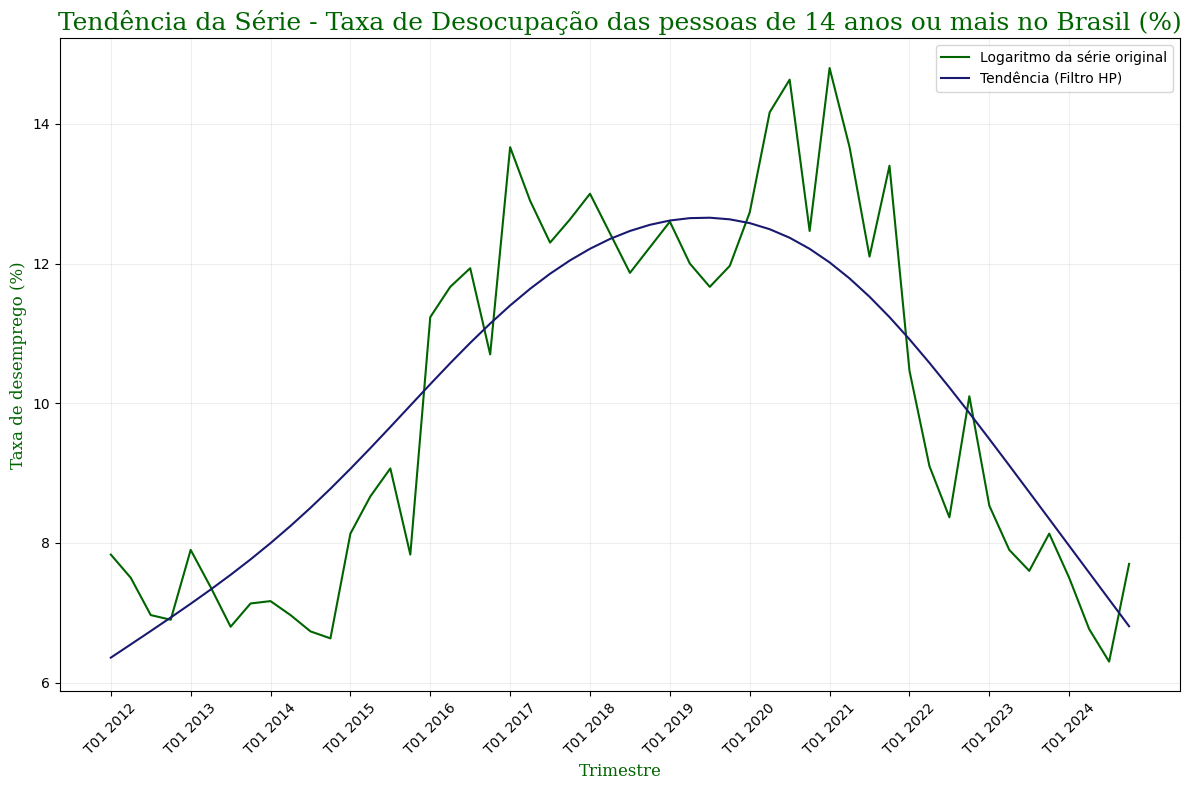

In [ ]:
# O filtro HP é usado para decompor a série em tendência e componente cíclico
def aplicar_filtro_hp(serie):
    ciclo, tendencia = hpfilter(serie, lamb=1600) # lambda=1600 é padrão para dados trimestrais
    return ciclo, tendencia

desemprego['Tx_desocupação_ciclo'], desemprego['Tx_desocupação_tendencia'] = aplicar_filtro_hp(desemprego['Taxa de desocupação'])

def plot_tendencia(data, original, tendencia, titulo):
    plt.figure(figsize=(12, 8))
    
    # Série original e tendência
    plt.plot(data, original, label='Série original', color='darkgreen')
    plt.plot(data, tendencia, label='Tendência (Filtro HP)', color='midnightblue')
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.title(f'Tendência da Série - {titulo}',  fontdict={'family':'serif','color':'darkgreen','size':18})
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'darkgreen','size':12})
    plt.ylabel('Taxa de desemprego (%)', fontdict={'family':'serif','color':'darkgreen','size':12})
    plt.grid(True, linestyle='-', alpha=0.2)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
plot_tendencia(desemprego['Data'], desemprego['Taxa de desocupação'], desemprego['Tx_desocupação_tendencia'], 'Taxa de Desocupação das pessoas de 14 anos ou mais no Brasil (%)')

In [88]:
# Média da taxa natural de desemprego
taxa_natural = desemprego['Tx_desocupação_tendencia'].mean()
print(f"A Taxa Natural de Desemprego é aproximadamente: {taxa_natural:.2f}%")

taxa_natural_recente = desemprego['Tx_desocupação_tendencia'].iloc[-1]
print(f"A Taxa Natural de Desemprego mais recente é: {taxa_natural_recente:.2f}%")


A Taxa Natural de Desemprego é aproximadamente: 10.02%
A Taxa Natural de Desemprego mais recente é: 6.81%


### ii. Em quais períodos de tempo, a taxa de desocupação ficou acima da taxa natural de desemprego? Identifique episódios históricos associando-os aos resultados encontrados.


iii. Agora obtenha a série de desemprego para os Estados Unidos (Unemployment Rate Percent, Monthly, Seasonally Adjusted) em https://fred.stlouisfed.org/series/UNRATE. Use um período comparável ao disponível para a taxa de desocupação do Brasil. Aplique o filtro HP e obtenha uma estimativa para a taxa de desemprego natural americana. Faça um gráfico para a série junto com sua tendência estimada pelo filtro HP.

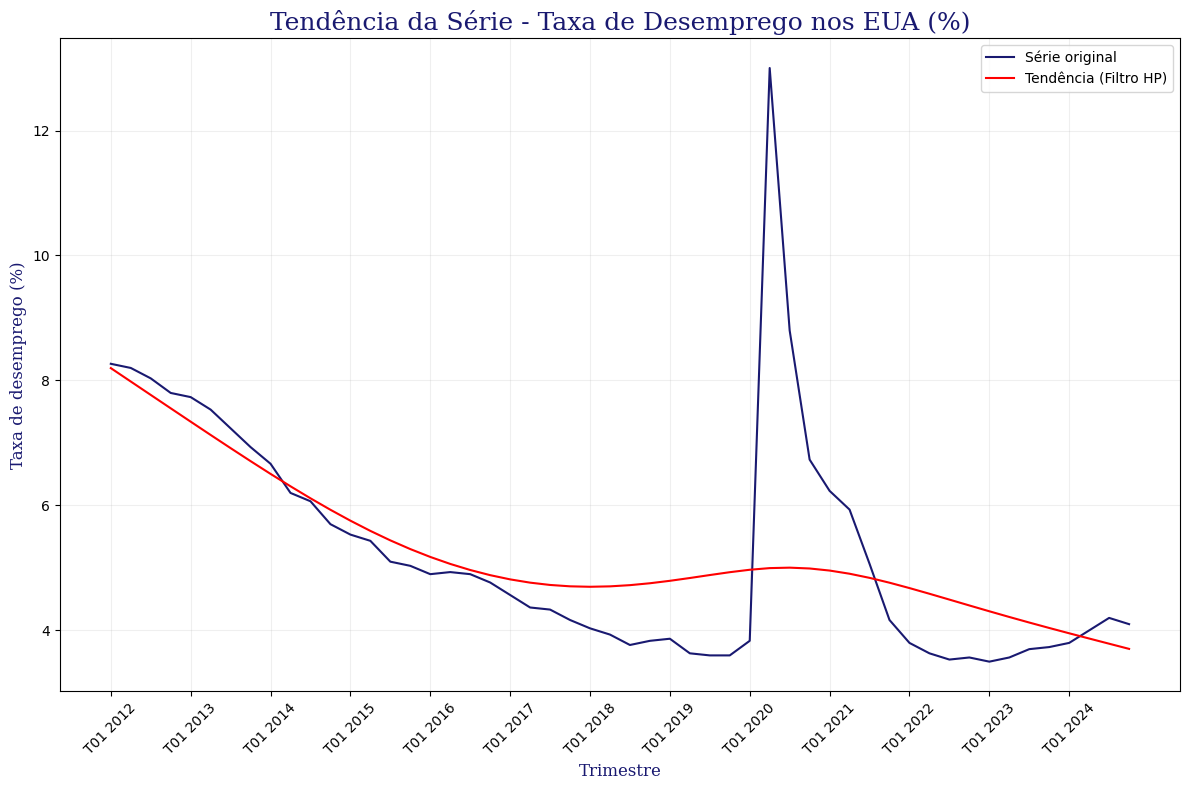

In [104]:
df_desemprego_eua['Tx_desocupação_ciclo'], df_desemprego_eua['Tx_desocupação_tendencia'] = aplicar_filtro_hp(df_desemprego_eua['Taxa de desemprego'])

def plot_tendencia_eua(data, original, tendencia, titulo):
    plt.figure(figsize=(12, 8))
    
    # Série original e tendência
    plt.plot(data, original, label='Série original', color='midnightblue')
    plt.plot(data, tendencia, label='Tendência (Filtro HP)', color='red')
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.title(f'Tendência da Série - {titulo}',  fontdict={'family':'serif','color':'midnightblue','size':18})
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.ylabel('Taxa de desemprego (%)', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.grid(True, linestyle='-', alpha=0.2)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
plot_tendencia_eua(df_desemprego_eua['Data'], df_desemprego_eua['Taxa de desemprego'], df_desemprego_eua['Tx_desocupação_tendencia'], 'Taxa de Desemprego nos EUA (%)')

In [105]:
# Média da taxa natural de desemprego
taxa_natural = df_desemprego_eua['Tx_desocupação_tendencia'].mean()
print(f"A Taxa Natural de Desemprego é aproximadamente: {taxa_natural:.2f}%")

taxa_natural_recente = df_desemprego_eua['Tx_desocupação_tendencia'].iloc[-1]
print(f"A Taxa Natural de Desemprego mais recente é: {taxa_natural_recente:.2f}%")


A Taxa Natural de Desemprego é aproximadamente: 5.26%
A Taxa Natural de Desemprego mais recente é: 3.70%


iv. Agora faça um gráfico com as duas séries de tendência (taxa de desemprego natural) do Brasil e dos EUA. Como as séries se comparam? Quais as razões que você apontaria para a diferença entre as séries?

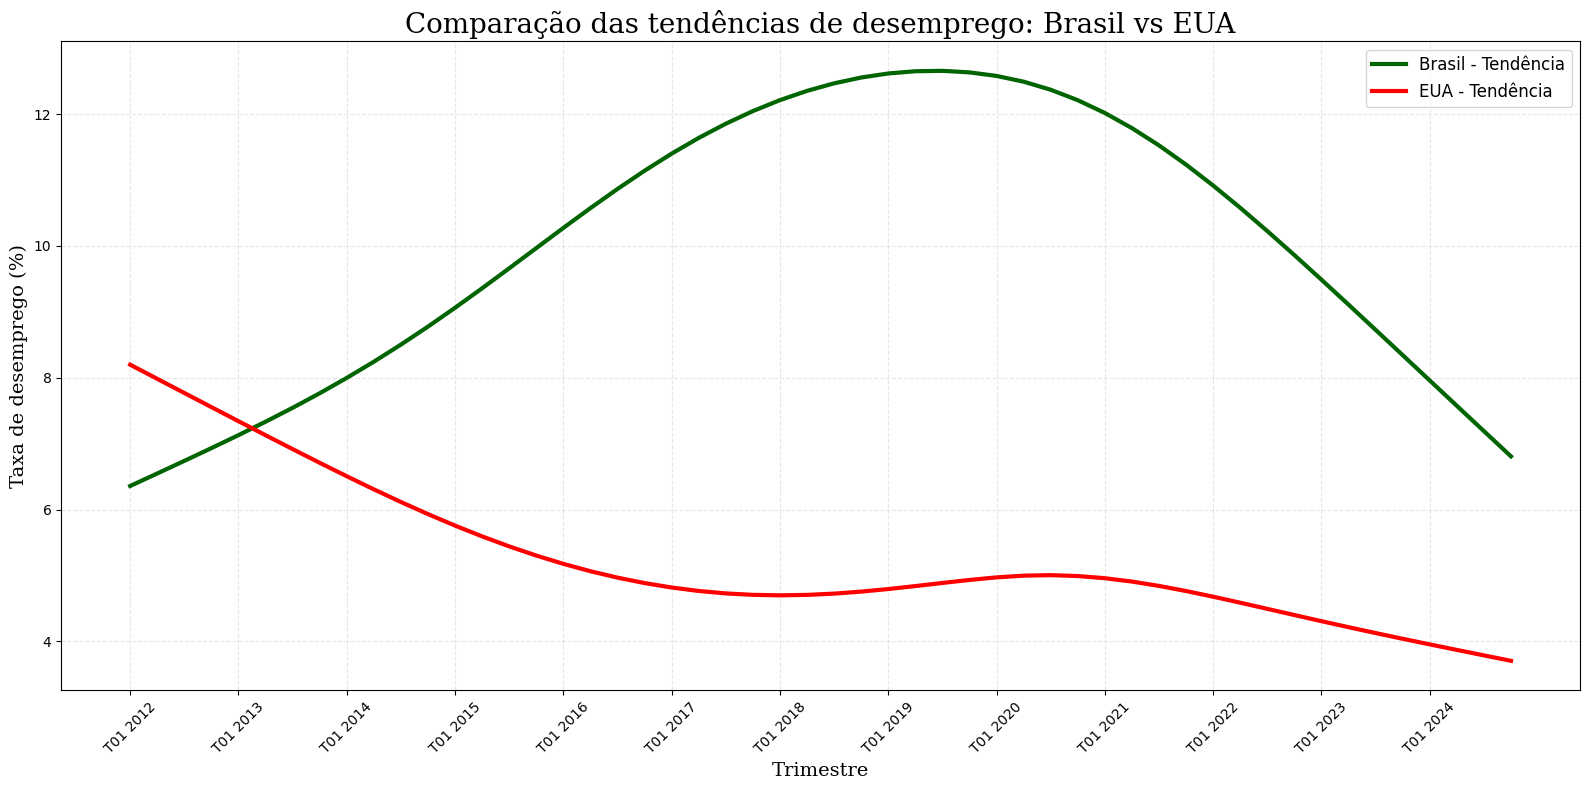

In [119]:
plt.figure(figsize=(16,8))
plt.plot(desemprego['Data'], desemprego['Tx_desocupação_tendencia'], label='Brasil - Tendência', color='darkgreen', linewidth=3)
plt.plot(df_desemprego_eua['Data'], df_desemprego_eua['Tx_desocupação_tendencia'], label='EUA - Tendência', color='red', linewidth=3)

plt.title('Comparação das tendências de desemprego: Brasil vs EUA', fontdict={'family':'serif','color':'black','size':20})
plt.xlabel('Trimestre', fontdict={'family':'serif','color':'black','size':14})
plt.xticks(range(0, len(desemprego['Data']), 4), desemprego['Data'][::4], rotation=45)
plt.ylabel('Taxa de desemprego (%)', fontdict={'family':'serif','color':'black','size':14})
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Diferenças nas Taxas de Desemprego entre Brasil e Estados Unidos (2012-2024)

#### Níveis Absolutos de Desemprego
O Brasil tende a apresentar uma taxa de desemprego mais alta que a dos Estados Unidos. Isso se deve a várias diferenças estruturais nas economias dos dois países. No Brasil, a rigidez do mercado de trabalho e a desigualdade econômica são fatores significativos que contribuem para essa diferença. Em contraste, os Estados Unidos possuem um mercado de trabalho mais flexível, o que facilita a recuperação após crises econômicas.

#### Volatilidade
A taxa de desemprego no Brasil é mais volátil, apresentando flutuações maiores devido a choques econômicos mais frequentes e intensos. Crises fiscais e políticas são comuns no Brasil e têm um impacto direto na confiança dos investidores e no mercado de trabalho. Nos Estados Unidos, embora também ocorram flutuações, a economia tende a ser mais estável e resiliente a choques externos.

#### Causas das Diferenças

1. **Estrutura Econômica**: 
   - **Brasil**: A rigidez do mercado de trabalho, com leis trabalhistas mais restritivas, dificulta a contratação e demissão de trabalhadores, o que pode aumentar a taxa de desemprego.
   - **EUA**: A flexibilidade do mercado de trabalho permite ajustes mais rápidos às mudanças econômicas, facilitando a recuperação após crises.

2. **Cenário Político**:
   - **Brasil**: Crises políticas frequentes afetam a confiança dos investidores e o ambiente de negócios, impactando negativamente o mercado de trabalho.
   - **EUA**: Embora também enfrentem desafios políticos, a estabilidade institucional é geralmente maior, o que contribui para um ambiente econômico mais previsível.

3. **Setores Dominantes**:
   - **Brasil**: A economia brasileira é fortemente dependente de commodities, o que a torna mais vulnerável a choques externos, como variações nos preços internacionais.
   - **EUA**: A economia dos Estados Unidos é mais diversificada, com setores como tecnologia, serviços financeiros e manufatura desempenhando papéis importantes, o que proporciona maior resiliência a choques externos.

#### Eventos Impactantes (2012-2024)

1. **Pandemia de COVID-19**:
   - **Brasil**: A pandemia teve um impacto devastador, exacerbando problemas estruturais e levando a um aumento significativo na taxa de desemprego. A recuperação foi lenta devido à falta de políticas eficazes e à instabilidade política.
   - **EUA**: Embora a pandemia também tenha causado um aumento no desemprego, a resposta rápida com pacotes de estímulo econômico e políticas de apoio ajudou na recuperação mais rápida do mercado de trabalho.

2. **Crises Econômicas e Políticas**:
   - **Brasil**: Crises como a recessão de 2015-2016 e os escândalos de corrupção afetaram gravemente a economia, resultando em altas taxas de desemprego.
   - **EUA**: A crise financeira de 2008 teve efeitos prolongados, mas a recuperação foi mais rápida devido à flexibilidade do mercado de trabalho e às políticas econômicas eficazes.

3. **Mudanças Tecnológicas e Industriais**:
   - **Brasil**: A adoção mais lenta de novas tecnologias e a dependência de setores tradicionais limitam a criação de empregos de alta qualidade.
   - **EUA**: A rápida inovação tecnológica e a liderança em setores emergentes, como tecnologia da informação, têm contribuído para a criação de empregos e a redução do desemprego.
